In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline
# Import a bunch of libraries.
import time
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import binarize
from sklearn.preprocessing import Binarizer
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
# Set the randomizer seed so results are the same each time.
np.random.seed(0)
print 'success'

success


In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home="C:/w207numbers")
print 'finished ****'

finished ****


In [3]:
X, Y = mnist.data, mnist.target
X = X / 255.0
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]
semi_train_data, semi_train_labels = X[:10000], Y[:10000]
number_labels = ['0:','1:','2:','3:','4:','5:','6:','7:','8:','9:']
"finished shuffle and assign"

'finished shuffle and assign'

In [4]:
# KNeighbors***********************
clf = KNeighborsClassifier()
clf.fit(mini_train_data, mini_train_labels)
preds = clf.predict(dev_data)
correct, total = 0, 0
# zip pairs up two rows of data for comparison
for pred, label in zip(preds, dev_labels):
    if pred == label: correct += 1
    total += 1
print 'nearest neighbor'
print 'total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total)
print ''

nearest neighbor
total: 1000  correct: 869  accuracy: 0.87



finished ***


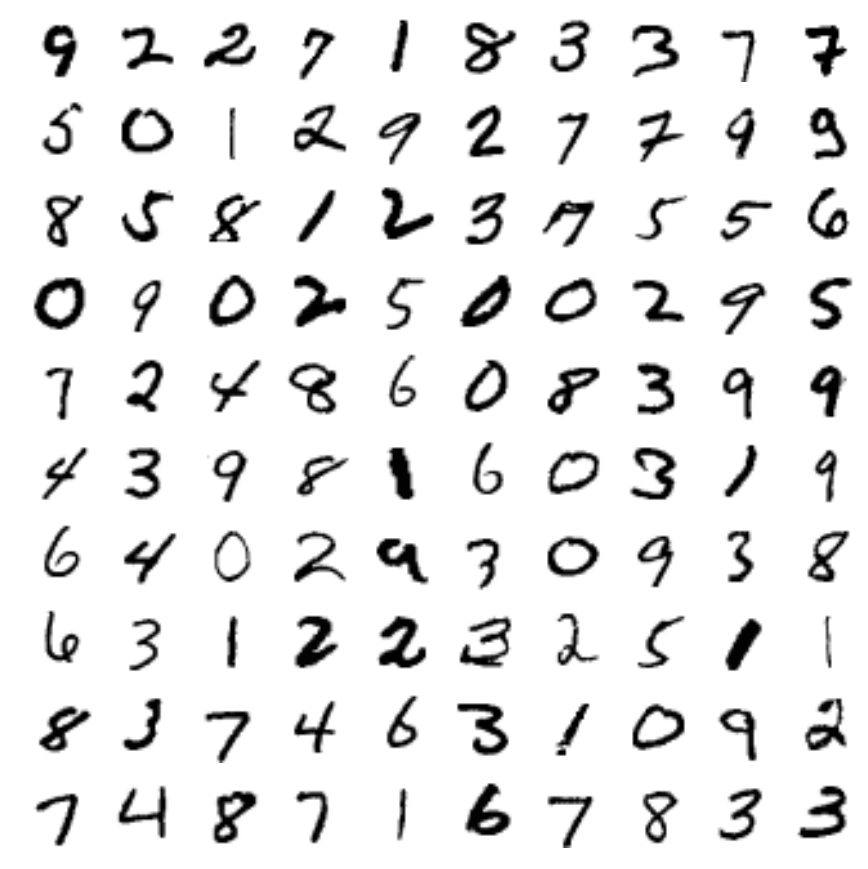

In [5]:
#1  Show images***************************
plt.figure(figsize=(15,15))
plt.set_cmap('gray_r')
for i in range (1, 101):  
    plt.subplot(10, 10, i) 
    my_image = X[i]
    my_image.shape = (28, 28)
    plt.imshow(my_image)
    plt.axis('off')  
print 'finished ***'

In [134]:
#2  KNN for k values 1, 3, 5, 7, 9************************
#Answer: Optimal fitting occurs when K= 3 to 5. For K>5 accuracy decreases 
# due to overfitting
for i in range(1, 10, 2):
    clf = KNeighborsClassifier(n_neighbors=i)    
    clf.fit(mini_train_data, mini_train_labels)
    print 'for i == ', i, 'accuracy = ', (clf.score(dev_data, dev_labels))        
    
print 'finished'

for i ==  1 accuracy =  0.97
for i ==  3 accuracy =  0.973
for i ==  5 accuracy =  0.973
for i ==  7 accuracy =  0.969
for i ==  9 accuracy =  0.964
finished


In [135]:
#2  KNN Classification report for k=1 ************************
#Answer: Numbers 0, 3, and 9 show less than 96% precision; 
#Digit 2 has the lowest recall

clf = KNeighborsClassifier(n_neighbors=1)    
clf.fit(mini_train_data, mini_train_labels)
preds = clf.predict(dev_data)
print 'report for i = ', 'i'
print classification_report(dev_labels, preds, target_names=number_labels)    

report for i =  i
             precision    recall  f1-score   support

         0:       0.95      1.00      0.98        99
         1:       0.97      1.00      0.99       105
         2:       0.99      0.93      0.96       102
         3:       0.94      0.95      0.95        86
         4:       0.99      0.98      0.99       104
         5:       0.98      0.96      0.97        91
         6:       0.99      0.97      0.98        98
         7:       0.96      0.96      0.96       113
         8:       0.97      0.95      0.96        96
         9:       0.95      0.99      0.97       106

avg / total       0.97      0.97      0.97      1000



In [95]:
#3  Training size accuracy************************
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
times = []
for i in range(0, 9):
    current_size = train_sizes[i]
    mini_train_data, mini_train_labels = X[:current_size], Y[:current_size]
    clf = KNeighborsClassifier()    
    clf.fit(mini_train_data, mini_train_labels)
    start = time.time()
    accuracies.append(clf.score(dev_data, dev_labels))    
    finish = time.time()
    times.append(finish-start)
for i in range(0, 9):    
    print 'for size == ', train_sizes[i], 'accuracy == ', accuracies[i], 'time taken = ', times[i]
    

for size ==  100 accuracy ==  0.598 time taken =  0.128999948502
for size ==  200 accuracy ==  0.752 time taken =  0.25200009346
for size ==  400 accuracy ==  0.81 time taken =  0.547999858856
for size ==  800 accuracy ==  0.85 time taken =  1.14900016785
for size ==  1600 accuracy ==  0.893 time taken =  2.39100003242
for size ==  3200 accuracy ==  0.919 time taken =  4.57100009918
for size ==  6400 accuracy ==  0.941 time taken =  10.8949999809
for size ==  12800 accuracy ==  0.958 time taken =  20.3489999771
for size ==  25000 accuracy ==  0.973 time taken =  38.8180000782


In [119]:
#Linear Regression
def myLogit(x):
    return np.log(x/(1-x))

In [127]:
#4 Linear Regression with transformation to Logit**********
npsizes = np.array(train_sizes).reshape(9,1)

regr = LinearRegression()
regr.fit(npsizes, accuracies)
pred_Acc = regr.predict(60000)
print 'linear accuracy of 60k  = ', pred_Acc[0]
#Accuracy cannot be over 100% !
#Use logit transformation
logAcc = []
for i in range (0, len(accuracies)):logAcc.append(myLogit(accuracies[i]))
logAccNp = np.array(logAcc).reshape(9,1)

regr = LinearRegression()
regr.fit(npsizes, logAccNp)

pred = regr.predict(60000)
transformBack = np.exp(pred)/((np.exp(pred))+1)
print "result after logit transform = ", transformBack[0][0]

linear accuracy of 60k  =  1.34253521072
result after logit transform =  0.999441575748


In [128]:
#5  Confusion Matrix***************************
#The digit 2 was confused 7 times: twice with zero, once with 3,
# three times with 7 and once with 8
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(mini_train_data, mini_train_labels)
preds = clf.predict(dev_data)
print confusion_matrix(dev_labels, preds)


[[ 99   0   0   0   0   0   0   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  2   0  95   1   0   0   0   3   1   0]
 [  0   0   0  82   0   2   0   0   1   1]
 [  0   0   0   0 102   0   0   0   0   2]
 [  1   0   0   0   0  87   1   0   1   1]
 [  1   1   0   0   1   0  95   0   0   0]
 [  1   2   0   0   0   0   0 109   0   1]
 [  0   0   1   4   0   0   0   0  91   0]
 [  0   0   0   0   0   0   0   1   0 105]]


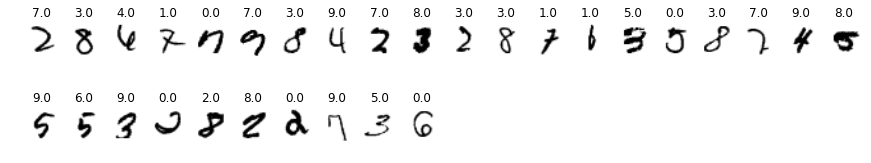

In [137]:
#5 Confusion Matrix show images that didn't work ************
#Images reflect confusion matrix mismatches from above
plt.figure(figsize=(15,15))
plt.set_cmap('gray_r')
j=1
for i in range(0,1000):
    if preds[i] != dev_labels[i]:
        curr_img= dev_data[i]
        plt.subplot(10, 20, j) 
        curr_img.shape = (28, 28)
        plt.imshow(curr_img)        
        plt.axis('off')  
        plt.title(preds[i])
        j+=1

In [7]:
#6   Gaussian Blur function definition for below
def gaussianblur(curr):
    #Begin Blur for one image
    curr.shape = (28, 28)
    final_img = []
    #set top border
    for toprow in range(0,28):
        final_img.append(0)    
    #print 'length of final image: ', len(final_img)
    for i in range(1, 27):
        #for border set edge pixel to 0    
        final_img.append(0)
        for j in range (1, 27):
            #used weights from http://www.pixelstech.net/article/1353768112-Gaussian-Blur-Algorithm
            sumofpixels = []        
            sumofpixels.append(curr[i-1,j-1]*0.0947416)
            sumofpixels.append(curr[i-1,j]*0.118318)
            sumofpixels.append(curr[i-1,j+1]*0.0947416)        
            sumofpixels.append(curr[i,j-1]*0.118318)
            sumofpixels.append(curr[i,j+1]*0.118318)        
            sumofpixels.append(curr[i+1,j-1]*0.0947416)
            sumofpixels.append(curr[i+1,j]*0.118318)
            sumofpixels.append(curr[i+1,j+1]*0.0947416)
            total=sum(sumofpixels)
            #print 'current pixel blur value = ', total
            final_img.append(total)
        #for border set edge pixel to 0
        final_img.append(0)
    #set bottom border    
    for bottomrow in range(0,28):
        final_img.append(0)
    return final_img


(-0.5, 27.5, 27.5, -0.5)

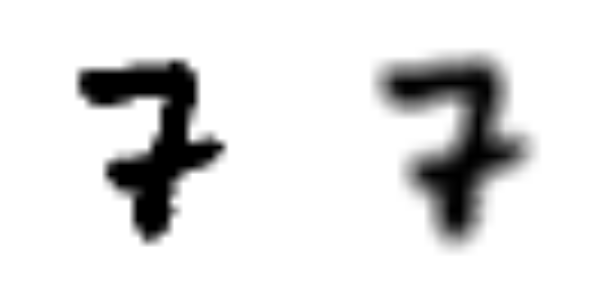

In [8]:
#Show example of Gaussian Blur before and after
plt.figure(figsize=(10,10))
plt.set_cmap('gray_r')

curr = mini_train_data[10]
curr.shape = (28, 28)
plt.subplot(1, 2, 1) 
plt.imshow(curr)       
plt.axis('off')  

final_img = gaussianblur(mini_train_data[10])
curr_reshaped = np.reshape(final_img, (-1, 28))
plt.subplot(1, 2, 2)
plt.imshow(curr_reshaped)       
plt.axis('off')  
## from kylehamilton fig, ax = plt.subplots(n, n, sharex=True, sharey=True, figsize=(17,17))


In [10]:
#6 Gaussian Blur demonstrate outcomes of 3 scenarios
# the best outcome is when blurring the training data and not test data
# (this is only slightly better than blurring both). 
# In blurring training data the model is more generalized 
# allowing larger range for fitting.

#Preprocess train data only
clf = GaussianNB()
blurred_train = []
for i in range(0, len(mini_train_data)):
    blurred_train.append(gaussianblur(mini_train_data[i]))
clf.fit(blurred_train, mini_train_labels)
print 'blur train data  = ', (clf.score(dev_data, dev_labels))    

#Preprocess test data only
clf = GaussianNB()
clf.fit(mini_train_data, mini_train_labels)
blurred_test = []
for i in range(0, len(dev_data)):
    blurred_test.append(gaussianblur(dev_data[i]))
print 'blur test data  = ', (clf.score(blurred_test, dev_labels))    

#Preprocess both
clf = GaussianNB()
clf.fit(blurred_train, mini_train_labels)
print 'blur both = ', (clf.score(blurred_test, dev_labels))    



blur train data  =  0.664
blur test data  =  0.485
blur both =  0.638


In [ ]:
#(7) Fit a Naive Bayes classifier and report accuracy on the dev data
# Remember that Naive Bayes estimates P(feature|label). 
#While sklearn can handle real-valued features, 
#let's start by mapping the pixel values to either 0 or 1. 
#You can do this as a preprocessing step, or 
#with the binarize argument. With binary-valued features, 
#you can use BernoulliNB. 
#Next try mapping the pixel values to 0, 1, or 2, representing white
# grey, or black. This mapping requires MultinomialNB. 
#Does the multi-class version improve the results? Why or why not?

In [17]:
#7 Naive Bayes Bernoulli****************
thresholdFl = 0.15

#binarize data to test
binarized_dev_data = Binarizer(threshold=thresholdFl).fit(dev_data) 
transformed_test_data= binarized_dev_data.transform(dev_data)

clf = BernoulliNB()
clf.fit(data_to_train, labels_to_train)
print 'bernoulli default accuracy = ', (clf.score(transformed_test_data, dev_labels))        

clf = BernoulliNB(binarize=thresholdFl)
clf.fit(data_to_train, labels_to_train)
print 'bernoulli binarize accuracy at threshold ',thresholdFl,' = ', (clf.score(transformed_test_data, dev_labels))        


bernoulli default accuracy =  0.82
bernoulli binarize accuracy at threshold  0.15  =  0.836


In [18]:
#7 Gaussian 
clf = GaussianNB()
clf.fit(mini_train_data, mini_train_labels)
preds = clf.predict(dev_data)
print 'gaussian = ', (clf.score(dev_data, dev_labels))    


gaussian =  0.621


In [21]:
#7 Mulitnomial 
clf = MultinomialNB()
clf.fit(mini_train_data, mini_train_labels)
preds = clf.predict(dev_data)
print 'multinomial = ', (clf.score(dev_data, dev_labels))    


multinomial =  0.794


In [20]:
#7 Multinomial Digitized/Bins
# Mappping values into buckets of 0-.33, .33-.66 and .66-1 
# Slightly better with buckets as they generalize the margins similar to blurring 
bins = np.array([0.0, 0.33, 0.66, 1.0])
digit_mini_train_data = np.digitize(mini_train_data, bins)
digit_test_data = np.digitize(dev_data, bins)

clf = MultinomialNB()
clf.fit(digit_mini_train_data, mini_train_labels)

print 'multinomial digitized = ', (clf.score(digit_test_data, dev_labels))    



multinomial digitized =  0.811


In [22]:
#8 Grid Search ********************
#Use GridSearchCV to perform a search over values of alpha 
#(the Laplace smoothing parameter) in a Bernoulli NB model. 
#What is the best value for alpha? 
#What is the accuracy when alpha=0? 
#Is this what you'd expect?
# Note that GridSearchCV partitions the training data so the results 
#will be a bit different than if you used the dev data for evaluation.
# *******************************
#Best alpha for mini train data is 0.0001
#Best alpha for dev data is 0.001, slightly different
# When alpha=0 accuracy is essentially zero

parameters = {'alpha': [0.000, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
svr = SVC()
clf = GridSearchCV(BernoulliNB(), parameters)
clf.fit(mini_train_data, mini_train_labels)
for i in range(0, len(clf.grid_scores_)):
    print clf.grid_scores_[i]
print 'mini train finished'

clf.fit(dev_data, dev_labels)
for i in range(0, len(clf.grid_scores_)):
    print clf.grid_scores_[i]
print 'dev finished'




mean: 0.09200, std: 0.00080, params: {'alpha': 0.0}
mean: 0.82000, std: 0.02208, params: {'alpha': 0.0001}
mean: 0.82000, std: 0.02305, params: {'alpha': 0.001}
mean: 0.82000, std: 0.02607, params: {'alpha': 0.01}
mean: 0.82100, std: 0.02454, params: {'alpha': 0.1}
mean: 0.81900, std: 0.02147, params: {'alpha': 0.5}
mean: 0.81200, std: 0.01814, params: {'alpha': 1.0}
mean: 0.81000, std: 0.01767, params: {'alpha': 2.0}
mean: 0.77500, std: 0.01719, params: {'alpha': 10.0}
mini train finished
mean: 0.09900, std: 0.00074, params: {'alpha': 0.0}
mean: 0.82200, std: 0.01299, params: {'alpha': 0.0001}
mean: 0.81900, std: 0.01054, params: {'alpha': 0.001}
mean: 0.82100, std: 0.01663, params: {'alpha': 0.01}
mean: 0.81600, std: 0.02032, params: {'alpha': 0.1}
mean: 0.81400, std: 0.02151, params: {'alpha': 0.5}
mean: 0.81300, std: 0.02006, params: {'alpha': 1.0}
mean: 0.80500, std: 0.01956, params: {'alpha': 2.0}
mean: 0.77000, std: 0.01893, params: {'alpha': 10.0}
dev finished


C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\sklearn\naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\sklearn\naive_bayes.py:785: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))


In [23]:
# I also used GridSearchCV to perform a search over values of binarize 
# to see which were optimal
parameters = {'binarize': [0.0, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
svr = SVC()

clf = GridSearchCV(BernoulliNB(), parameters)

clf.fit(mini_train_data, mini_train_labels)
for i in range(0, len(clf.grid_scores_)):
    print clf.grid_scores_[i]
print 'mini train finished'

clf.fit(semi_train_data, semi_train_labels)
for i in range(0, len(clf.grid_scores_)):
    print clf.grid_scores_[i]
print 'semi train finished'


mean: 0.81200, std: 0.01814, params: {'binarize': 0.0}
mean: 0.81500, std: 0.01376, params: {'binarize': 0.05}
mean: 0.81600, std: 0.01600, params: {'binarize': 0.1}
mean: 0.81400, std: 0.01453, params: {'binarize': 0.15}
mean: 0.81800, std: 0.01328, params: {'binarize': 0.2}
mean: 0.80800, std: 0.01090, params: {'binarize': 0.3}
mean: 0.80700, std: 0.00904, params: {'binarize': 0.4}
mean: 0.79500, std: 0.01145, params: {'binarize': 0.5}
mean: 0.79000, std: 0.02325, params: {'binarize': 0.6}
mean: 0.77800, std: 0.01847, params: {'binarize': 0.7}
mean: 0.77500, std: 0.01714, params: {'binarize': 0.8}
mean: 0.76200, std: 0.02217, params: {'binarize': 0.9}
mean: 0.11200, std: 0.00063, params: {'binarize': 1.0}
mini train finished
mean: 0.83410, std: 0.00184, params: {'binarize': 0.0}
mean: 0.83640, std: 0.00239, params: {'binarize': 0.05}
mean: 0.83700, std: 0.00137, params: {'binarize': 0.1}
mean: 0.83760, std: 0.00311, params: {'binarize': 0.15}
mean: 0.83920, std: 0.00365, params: {'bi

In [25]:
#9 Improve GaussianNB using sigmam theta***************
clf = GaussianNB()
clf.fit(mini_train_data, mini_train_labels)
preds = clf.predict(dev_data)
print 'GaussianNB before modifying sigma = ', (clf.score(dev_data, dev_labels))    

#for i in range(0, 10): print 'max of ', i, max(clf.sigma_[i])

A = []
B = []
for i in range(0,784):  A.append(1.2)
for j in range(0,10): B.append(A)
C = np.array(B)
print C.shape

clf.sigma_ = C
preds = clf.predict(dev_data)
print 'GaussianNB after modifying sigma with consistent value 2 = ', (clf.score(dev_data, dev_labels))    


GaussianNB before modifying sigma =  0.621
(10L, 784L)
GaussianNB after modifying sigma with consistent value 2 =  0.802


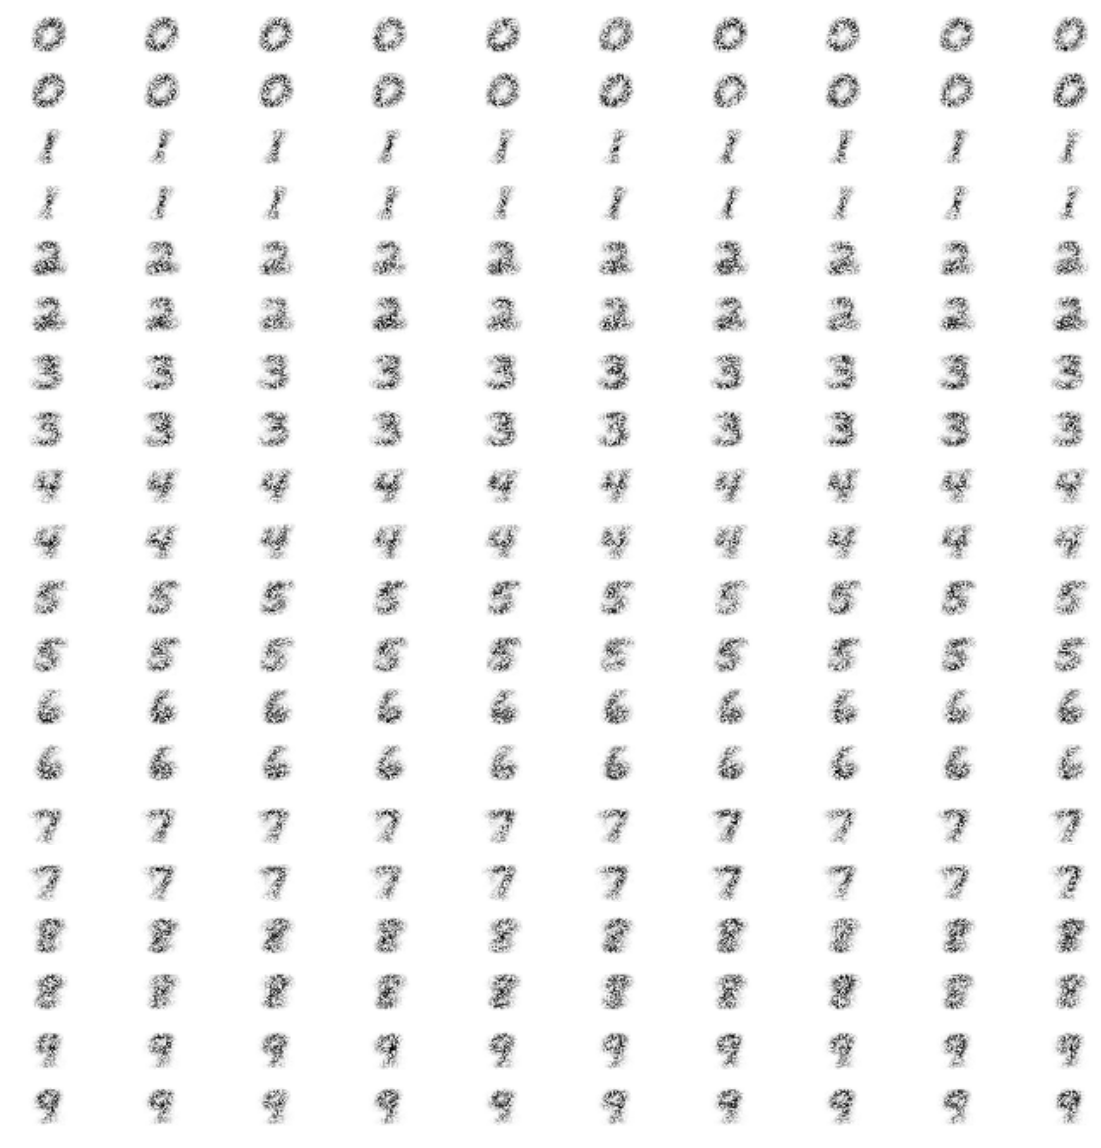

In [26]:
#10 Train Bernoulli ****** 
clf = BernoulliNB(alpha=0.0001)
clf.fit(mini_train_data, mini_train_labels)
nplog=clf.feature_log_prob_
my_features=np.exp(nplog)
listof200 = []
plt.figure(figsize=(20, 20))
plt.set_cmap('gray_r')
for i in range(0,10):
    curr_feature = my_features[i]
    for j in range(0, 20):        
        mynewnum = []
        for k in range(0, 784):
            new_prob = curr_feature[k]*np.random.rand()
            mynewnum.append(new_prob)
        listof200.append(mynewnum)
for i in range(0,10):
    for j in range(0, 20):          
        #index = (i*20+j)+1
        currentImage = np.reshape(listof200[(i*20+j)], (-1, 28))        
        plt.subplot(20, 10, (i*20+j)+1)
        plt.imshow(currentImage)
        plt.axis('off')  

In [27]:
#11 Bernoulli Calibration ****** 
buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
clf = BernoulliNB(alpha=0.0001)
clf.fit(mini_train_data, mini_train_labels)
preds = clf.predict(dev_data)
probs=clf.predict_proba(dev_data)
correct = [0, 0, 0, 0, 0, 0, 0, 0, 0]
total = [0, 0, 0, 0, 0, 0, 0, 0, 0]
for pred, prob, label in zip(preds, probs, dev_labels):
    maxProb = max(prob)
    if maxProb == 1: index = 8
    elif maxProb > 0.9999999999999: index = 7    
    elif maxProb > 0.99999999999: index = 6
    elif maxProb > 0.999999999: index = 5
    elif maxProb > 0.9999999: index = 4
    elif maxProb > 0.99999: index = 3
    elif maxProb > 0.999: index = 2
    elif maxProb > 0.9: index = 1
    elif maxProb > 0.5: index = 0
    if pred == label: correct[index]+=1
    total[index]+=1

for i in range(len(buckets)):
    accuracy = 0.00
    if (total[i] > 0):        
        accuracy = float(correct[i])/total[i] 
    print 'p(pred) <= %.13f  total = %3d accuracy = %.3f' %(buckets[i], total[i], accuracy)
    

p(pred) <= 0.5000000000000  total =  34 accuracy = 0.471
p(pred) <= 0.9000000000000  total =  59 accuracy = 0.407
p(pred) <= 0.9990000000000  total =  59 accuracy = 0.525
p(pred) <= 0.9999900000000  total =  59 accuracy = 0.593
p(pred) <= 0.9999999000000  total =  41 accuracy = 0.512
p(pred) <= 0.9999999990000  total =  50 accuracy = 0.700
p(pred) <= 0.9999999999900  total =  41 accuracy = 0.756
p(pred) <= 0.9999999999999  total =  17 accuracy = 0.706
p(pred) <= 1.0000000000000  total = 640 accuracy = 0.950
